In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

## Import Data

In [6]:
market_path = "data\\processed\\df_quarter_market_cap_07_18.csv"
key_path = 'data\\external\\quarterly_key_sp_500.csv'

In [9]:
df_cap = pd.read_csv(market_path)
df_cap.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df_cap.index = df_cap['Stock']
df_cap.drop('Stock', axis=1, inplace=True)

In [10]:
df_cap

,2007-03-31,2007-06-30,2007-09-30,2007-12-31,2008-03-31,2008-06-30,2008-09-30,2008-12-31,2009-03-31,2009-06-30,...,2016-09-30,2016-12-31,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31
Stock,,,,,,,,,,,,,,,,,,,,,
AAPL,2.259415e+10,2.781990e+10,3.493417e+10,4.689335e+10,4.233140e+10,4.557635e+10,4.152004e+10,2.755189e+10,2.620533e+10,3.514859e+10,...,1.077180e+11,1.059862e+11,1.191135e+11,1.291119e+11,1.289905e+11,1.284101e+11,1.034879e+11,9.490702e+10,9.303196e+10,7.987202e+10
AAP,4.029422e+09,4.234284e+09,3.488207e+09,3.414902e+09,3.295897e+09,3.602546e+09,3.852041e+09,2.923150e+09,3.530591e+09,4.109087e+09,...,1.171166e+10,1.150386e+10,1.172801e+10,9.263846e+09,7.301866e+09,6.902159e+09,8.277441e+09,9.095697e+09,1.129853e+10,1.198755e+10
AA,2.788560e+10,3.382606e+10,3.351030e+10,3.009912e+10,2.704441e+10,3.189319e+10,2.264629e+10,1.168452e+10,8.482691e+09,9.457899e+09,...,1.315435e+10,1.076229e+10,1.087078e+10,1.111398e+10,1.191759e+10,1.221414e+10,1.297370e+10,9.789492e+09,9.606858e+09,9.514539e+09
ABC,9.366824e+09,9.242960e+09,7.749728e+09,7.314020e+09,6.987997e+09,6.449381e+09,6.311239e+09,4.909430e+09,5.055251e+09,5.228754e+09,...,1.871512e+10,1.633509e+10,1.897078e+10,1.942643e+10,1.889245e+10,1.826988e+10,2.078687e+10,1.910213e+10,1.799315e+10,1.733048e+10
ABMD,4.414972e+08,3.971059e+08,3.945132e+08,4.508959e+08,4.617211e+08,5.541965e+08,6.652908e+08,5.242521e+08,3.996504e+08,2.554858e+08,...,5.204418e+09,4.965226e+09,5.029583e+09,5.839568e+09,6.865883e+09,8.082474e+09,1.094866e+10,1.627156e+10,1.800455e+10,1.654108e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,1.622546e+10,1.707002e+10,1.649639e+10,1.536926e+10,1.300140e+10,1.249038e+10,1.101043e+10,7.156103e+09,5.737859e+09,5.192762e+09,...,9.904597e+09,9.576217e+09,7.192335e+09,7.142171e+09,7.915082e+09,7.800648e+09,8.345846e+09,7.119889e+09,6.252538e+09,5.488166e+09
X,1.008272e+10,1.337716e+10,1.126728e+10,1.214387e+10,1.291444e+10,1.868061e+10,1.461346e+10,5.729728e+09,3.375977e+09,4.537681e+09,...,3.738912e+09,4.820882e+09,6.322690e+09,4.687631e+09,4.287364e+09,5.336296e+09,6.942715e+09,6.255989e+09,5.919000e+09,4.157344e+09
YUM,1.537889e+10,1.643610e+10,1.638225e+10,1.705120e+10,1.708275e+10,1.832246e+10,1.675848e+10,1.413830e+10,1.300287e+10,1.495785e+10,...,3.130557e+10,2.670461e+10,2.286830e+10,2.389624e+10,2.536214e+10,2.621201e+10,2.631311e+10,2.626118e+10,2.628957e+10,2.737198e+10


In [11]:
df_key = pd.read_csv(key_path)
df_key.index = df_key['symbol']
df_key.drop(['symbol', 'Unnamed: 2'], axis=1, inplace=True)

In [12]:
df_key

,company
symbol,
A,AGILENT TECHNOLOGIES INC
AA,ALCOA INC
AAP,ADVANCE AUTO PARTS INC
AAPL,APPLE
ABBV,ABBVIE INC
...,...
XYL,XYLEM INC
YUM,YUM BRANDS INC
ZMH,ZIMMER BIOMET HOLDINGS INC


## Explore - Market Cap Difference from Q3 2008 (2008-09-30) to Q2 2009 (2009-06-30)

In [16]:
df_cap_diff = pd.DataFrame(index=df_cap.index, columns=['difference'])

In [18]:
df_cap_diff['difference'] = df_cap['2008-09-30'] - df_cap['2009-06-30']

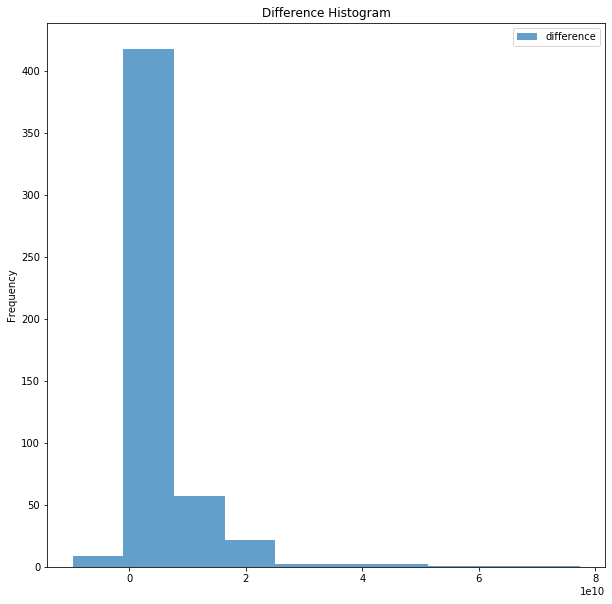

In [28]:
# plot shows most of the differences are slightly positive
# i.e. market cap was higher before the recession than after

df_cap_diff.plot.hist(alpha=0.7, figsize=(10,10), title='Difference Histogram')

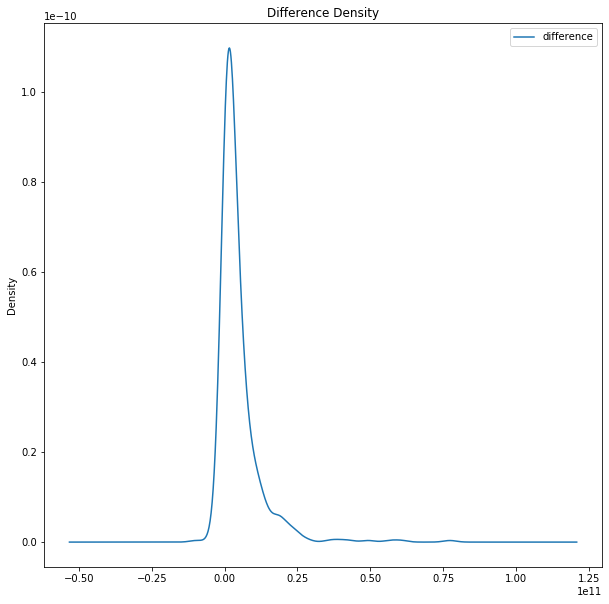

In [31]:
df_cap_diff.plot.kde(figsize=(10,10), title='Difference Density')

In [33]:
df_cap_diff_cand = df_cap_diff[df_cap_diff['difference']<= 0]
df_cap_diff_cand

,difference
Stock,
AAP,-2.570456e+08
ALK,-1.335759e+07
AMZN,-1.782181e+09
AN,-4.981890e+08
APU,-4.777093e+07
ARRS,-2.338120e+08
AZO,-7.083336e+08
CERN,-5.334440e+08
CMG,-1.605686e+08
